In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('/content/AAPL.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
data = pd.read_csv('/content/AAPL.csv')

In [ ]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"}) 
data.head()

,ds,y
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True)
m.fit(data) 

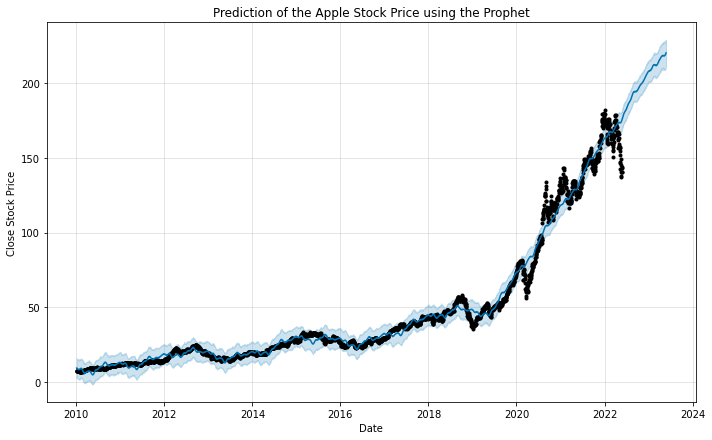

In [ ]:
future = m.make_future_dataframe(periods=365) 
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Apple Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

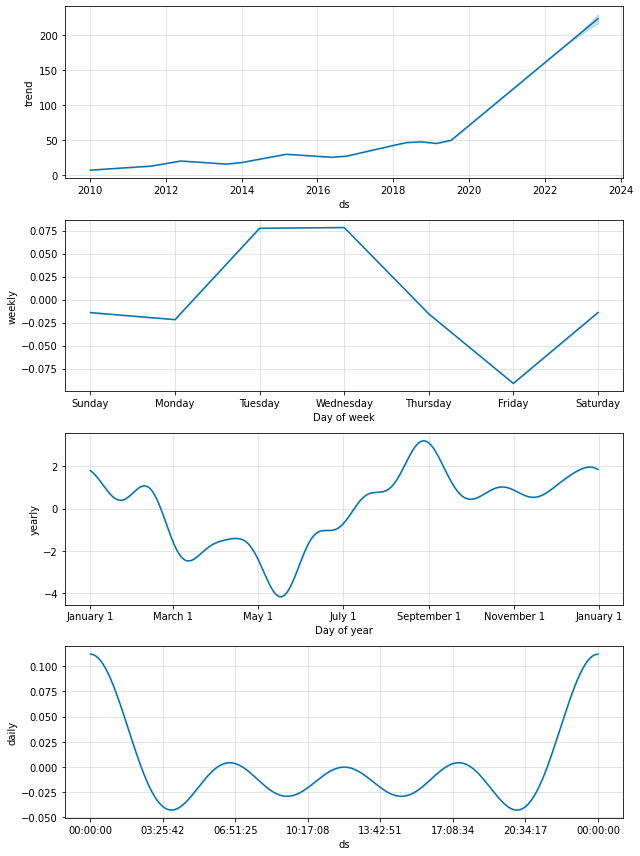

In [ ]:
m.plot_components(prediction)
plt.show()